## travel insurance 데이터 - 보험가입여부 예측

- travel insurance 데이터를 활용해서 보험가입여부를 예측하라. 
- 데이터 : https://www.kaggle.com/agileteam/traval-insurance-exam 
- X_train.csv, y_train.csv
- X_test.csv
- 평가: roc-auc 평가지표

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
train = pd.read_csv('./practice/train.csv')
test = pd.read_csv('./practice/test.csv')

X_train = train.drop(columns='TravelInsurance')
Y_train = train[['Unnamed: 0', 'TravelInsurance']]
X_test = test

In [ ]:
for x in [X_train, X_test, Y_train]:
    print(x.shape)

(1490, 9)
(497, 9)
(1490, 2)


In [ ]:
X_train

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1704,26,Private Sector/Self Employed,Yes,1400000,3,1,No,Yes
1,491,28,Private Sector/Self Employed,Yes,1100000,4,1,No,No
2,414,33,Private Sector/Self Employed,Yes,1400000,4,0,No,Yes
3,120,28,Private Sector/Self Employed,Yes,800000,3,1,No,No
4,1268,33,Government Sector,Yes,1000000,5,0,No,Yes
...,...,...,...,...,...,...,...,...,...
1485,1045,28,Private Sector/Self Employed,Yes,1100000,4,1,No,No
1486,342,28,Private Sector/Self Employed,Yes,1100000,2,0,No,No
1487,393,29,Private Sector/Self Employed,Yes,1050000,3,0,Yes,No
1488,572,28,Private Sector/Self Employed,No,550000,5,0,No,No


In [ ]:
Y_train['TravelInsurance'].value_counts(normalize=True)

TravelInsurance
0   0.6376
1   0.3624
Name: proportion, dtype: float64

In [ ]:
dfX = pd.concat([X_train, X_test], axis=0, ignore_index=True)
dfX.info()   # Employment Type, GraduateOrNot, FrequentFlyer, EverTravelledAbroad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [ ]:
dfX.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [ ]:
for x in ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']:
   print(f"{x}'s unique : {dfX[x].nunique()}")

Employment Type's unique : 2
GraduateOrNot's unique : 2
FrequentFlyer's unique : 2
EverTravelledAbroad's unique : 2


In [ ]:
# encoding
objcols = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

# label encoding
for t in objcols:
    A = dfX[t].unique()
    dfX[t] = dfX[t].replace(A, [0, 1])

for x in ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']:
    dfX[x] = dfX[x].astype('category').cat.codes

# one-hot
for x in ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']:
   a = dfX[x].str.get_dummies()
   b = dfX[x].str.get_dummies()
   c = dfX[x].str.get_dummies()
   d = dfX[x].str.get_dummies()
   
dfX_oh = dfX.drop(columns=['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'])
dfX2 = pd.concat([dfX_oh, a, b, c, d], axis=1)
# dfX2.info()

In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   Employment Type      1987 non-null   int8 
 3   GraduateOrNot        1987 non-null   int8 
 4   AnnualIncome         1987 non-null   int64
 5   FamilyMembers        1987 non-null   int64
 6   ChronicDiseases      1987 non-null   int64
 7   FrequentFlyer        1987 non-null   int8 
 8   EverTravelledAbroad  1987 non-null   int8 
dtypes: int64(5), int8(4)
memory usage: 85.5 KB


In [ ]:
X = dfX.iloc[:1490, 1:]
X_submission = dfX.iloc[1490:, 1:]
Y1 = Y_train['TravelInsurance']

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

Xs = scaler1.fit_transform(X)
Xs_submission = scaler1.transform(X_submission)

print(Xs.shape, Xs_submission.shape, Y1.shape)

(1490, 8) (497, 8) (1490,)


In [ ]:
def get_scores(model, xtrain, xtest, ytrain, ytest):
    ''' score 출력 함수 '''
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    C = A - B
    ypred = model.predict_proba(xtest)[:, 1]
    D = roc_auc_score(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f} {:.4f}'.format(A, B, C, D)

def select_model(xtrain, xtest, ytrain, ytest):
    ''' 모델 별 score 출력 '''
    for d in range(3, 8):
        model1 = DecisionTreeClassifier(max_depth=d, random_state=1234).fit(xtrain, ytrain)
        print(f'model1_{d}: ', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for d in range(3, 8):
        model2 = RandomForestClassifier(n_estimators=1000, max_depth=d, random_state=1234).fit(xtrain, ytrain)
        print(f'model2_{d}: ', get_scores(model2, xtrain, xtest, ytrain, ytest))

    for d in range(3, 8):
        model3 = XGBClassifier(n_estimators=1000, max_depth=d, eval_metric='logloss', use_label_encoder=False, gamma=7, random_state=1234).fit(xtrain, ytrain)
        print(f'model3_{d}: ', get_scores(model3, xtrain, xtest, ytrain, ytest))

    model4 = LGBMClassifier(n_estimators=1000, min_child_samples=100, learning_rate=0.01, random_state=1234).fit(xtrain, ytrain)
    print('model4: ', get_scores(model4, xtrain, xtest, ytrain, ytest))

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(Xs, Y1,
                                                test_size=0.3,
                                                stratify=Y1,
                                                random_state=1234)

select_model(xtrain, xtest, ytrain, ytest)
# model1_4:  0.8389 0.8338 0.0051 0.8276
# model1_5:  0.8418 0.8277 0.0141 0.8364

In [ ]:
model = DecisionTreeClassifier(max_depth=4, random_state=1234).fit(xtrain, ytrain)
#print('decided_model: ', get_scores(model, xtrain, xtest, ytrain, ytest))

pred = model.predict_proba(Xs_submission)[:, 1]
Submission = pd.DataFrame({'ID' : X_test['Unnamed: 0'],
                           'TravelInsurance' : pred})
Submission.to_csv('050500505.csv', index=False)

## 자동차 시장 세분화

- 자동차 회사는 새로운 전략을 수립하기 위해 4개의 시장으로 세분화했습니다.
- 기존 고객 분류 자료를 바탕으로 신규 고객이 어떤 분류에 속할지 예측해주세요!
- 예측할 값(y): "Segmentation" (1,2,3,4)
- 평가: Macro f1-score
- 제출형식

        ID,Segmentation
        458989,1
        458994,2
        459000,3
        459003,4

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings

warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/train_04.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/test_04.csv')

train.shape, test.shape

((6665, 11), (2154, 10))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB


In [ ]:
train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00000,Low,4.00000,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.00000,Low,1.00000,Cat_6,2
2,461735,Male,Yes,67,Yes,Lawyer,0.00000,High,2.00000,Cat_6,2
3,461319,Male,Yes,56,No,Artist,0.00000,Average,2.00000,Cat_6,3
4,460156,Male,No,32,Yes,Healthcare,1.00000,Low,3.00000,Cat_6,3
5,464347,Female,No,33,Yes,Healthcare,1.00000,Low,3.00000,Cat_6,4
6,465015,Female,Yes,61,Yes,Engineer,0.00000,Low,3.00000,Cat_7,4
7,465176,Female,Yes,55,Yes,Artist,1.00000,Average,4.00000,Cat_6,3
8,464041,Female,No,26,Yes,Engineer,1.00000,Low,3.00000,Cat_6,1
9,464942,Male,No,19,No,Healthcare,4.00000,Low,4.00000,Cat_4,4


In [ ]:
train.describe()

,ID,Age,Work_Experience,Family_Size,Segmentation
count,6665.00000,6665.00000,6665.00000,6665.00000,6665.00000
mean,463519.84096,43.53608,2.62911,2.84111,2.54284
std,2566.43174,16.52405,3.40537,1.52474,1.12272
min,458982.00000,18.00000,0.00000,1.00000,1.00000
25%,461349.00000,31.00000,0.00000,2.00000,2.00000
50%,463575.00000,41.00000,1.00000,2.00000,3.00000
75%,465741.00000,53.00000,4.00000,4.00000,4.00000
max,467974.00000,89.00000,14.00000,9.00000,4.00000


In [ ]:
train.describe(include="O")

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,6665,6665,6665,6665,6665,6665
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,3677,3944,4249,2192,3999,4476


In [ ]:
cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
for col in cat_cols:
    print(col)
    print(train[col].unique())
    print()

Gender
['Male' 'Female']

Ever_Married
['No' 'Yes']

Graduated
['No' 'Yes']

Profession
['Healthcare' 'Engineer' 'Lawyer' 'Artist' 'Doctor' 'Homemaker'
 'Entertainment' 'Marketing' 'Executive']

Spending_Score
['Low' 'High' 'Average']

Var_1
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']



In [ ]:
train.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [ ]:
test.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


<Axes: >

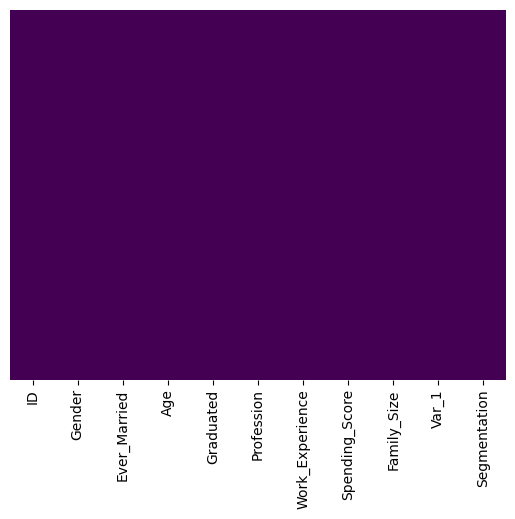

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
target = "Segmentation"

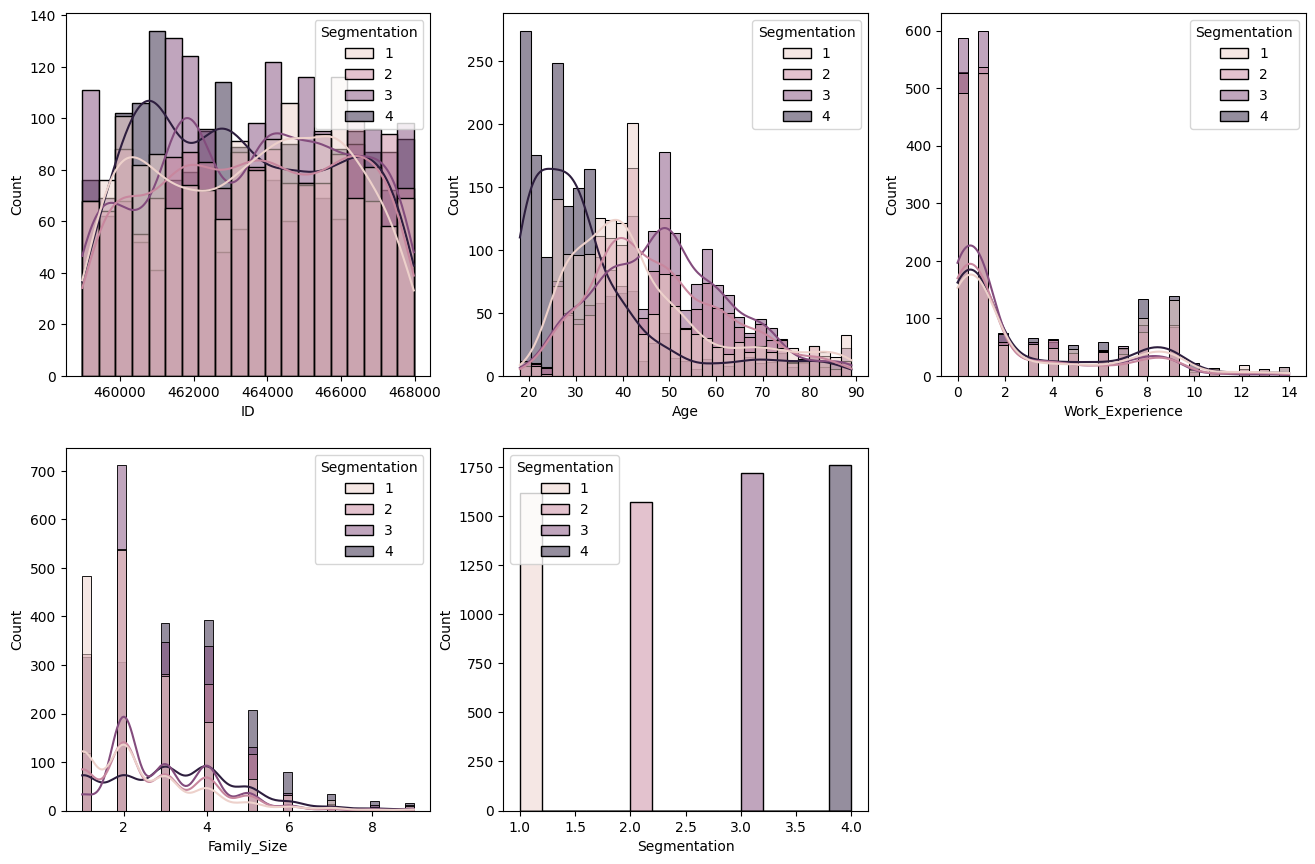

In [ ]:
# 수치형 확인
plt.figure(figsize=(16, 16))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=train, x=col, hue=target, kde=True)

# age 치우침. log1p 취하자.
# work_experience 는 junior, senior 로 나누자.

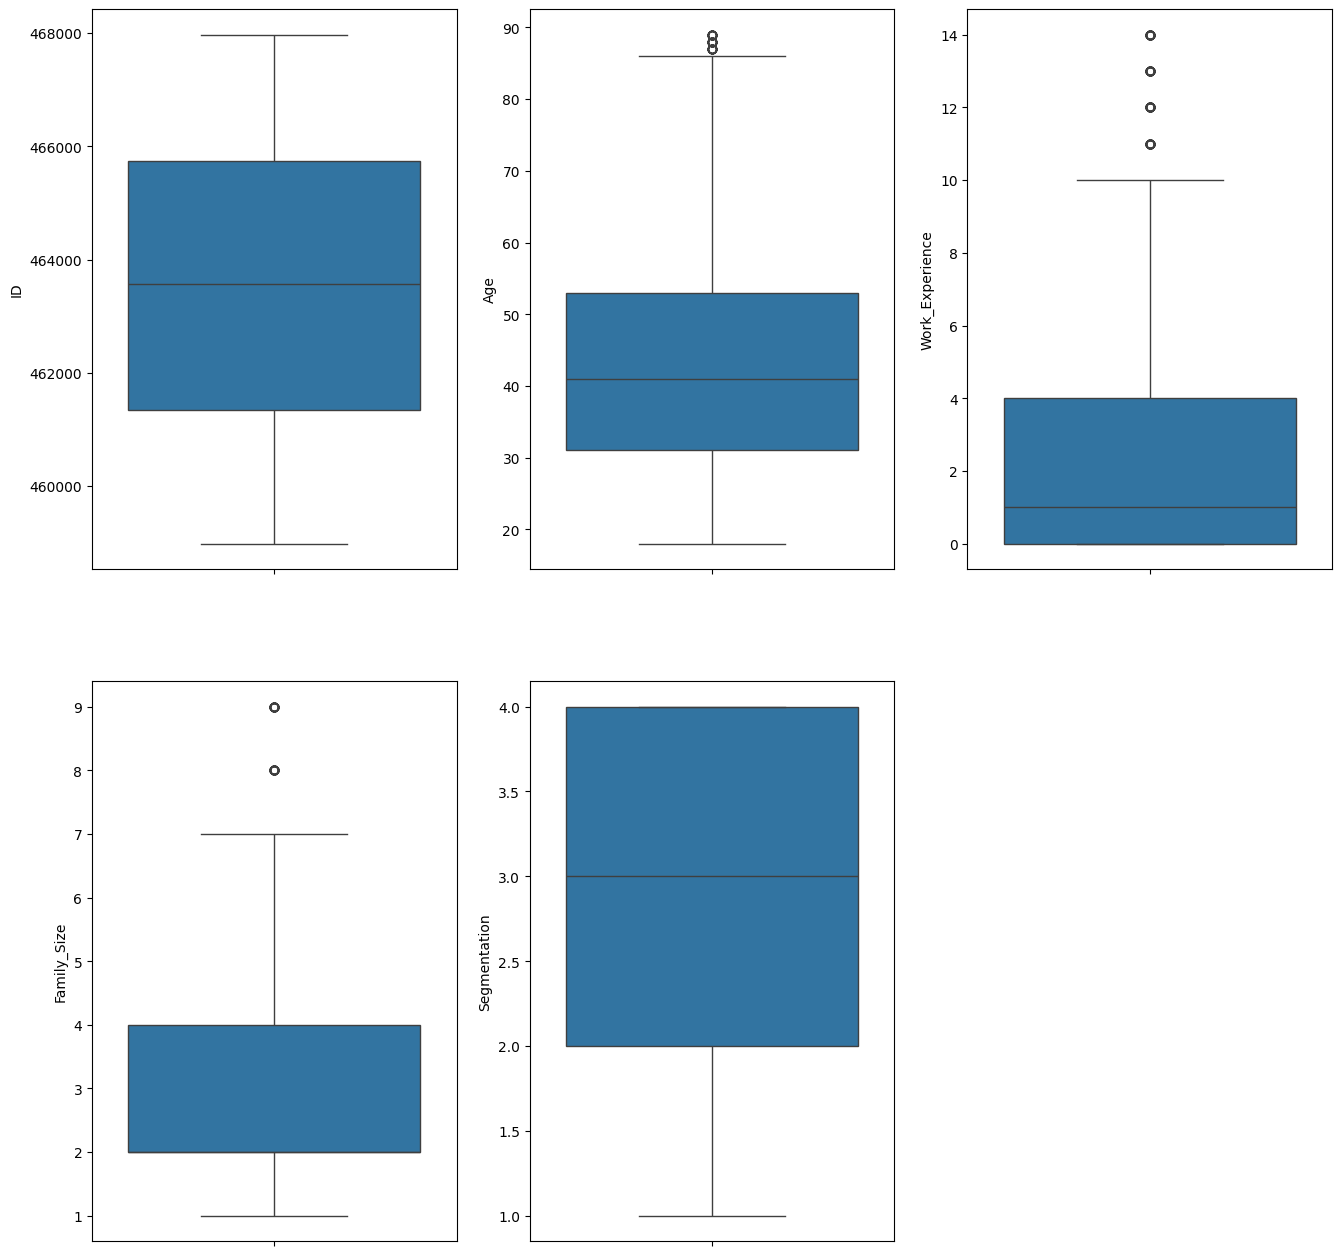

In [ ]:
# numeric outlier

plt.figure(figsize=(16, 16))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(train[col])

In [ ]:
Q1, Q3 = train["Age"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

cond = (train["Age"] < lower_bound) | (train["Age"] > upper_bound)
print(len(train.loc[cond, "Age"]))

train.loc[train["Age"] < lower_bound, "Age"] = lower_bound
train.loc[train["Age"] > upper_bound, "Age"] = upper_bound

-2.0 86.0
76


In [ ]:
Q1, Q3 = train["Family_Size"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

cond = (train["Family_Size"] < lower_bound) | (train["Family_Size"] > upper_bound)
print(len(train.loc[cond, "Family_Size"]))

train.loc[train["Family_Size"] < lower_bound, "Family_Size"] = lower_bound
train.loc[train["Family_Size"] > upper_bound, "Family_Size"] = upper_bound

-1.0 7.0
80


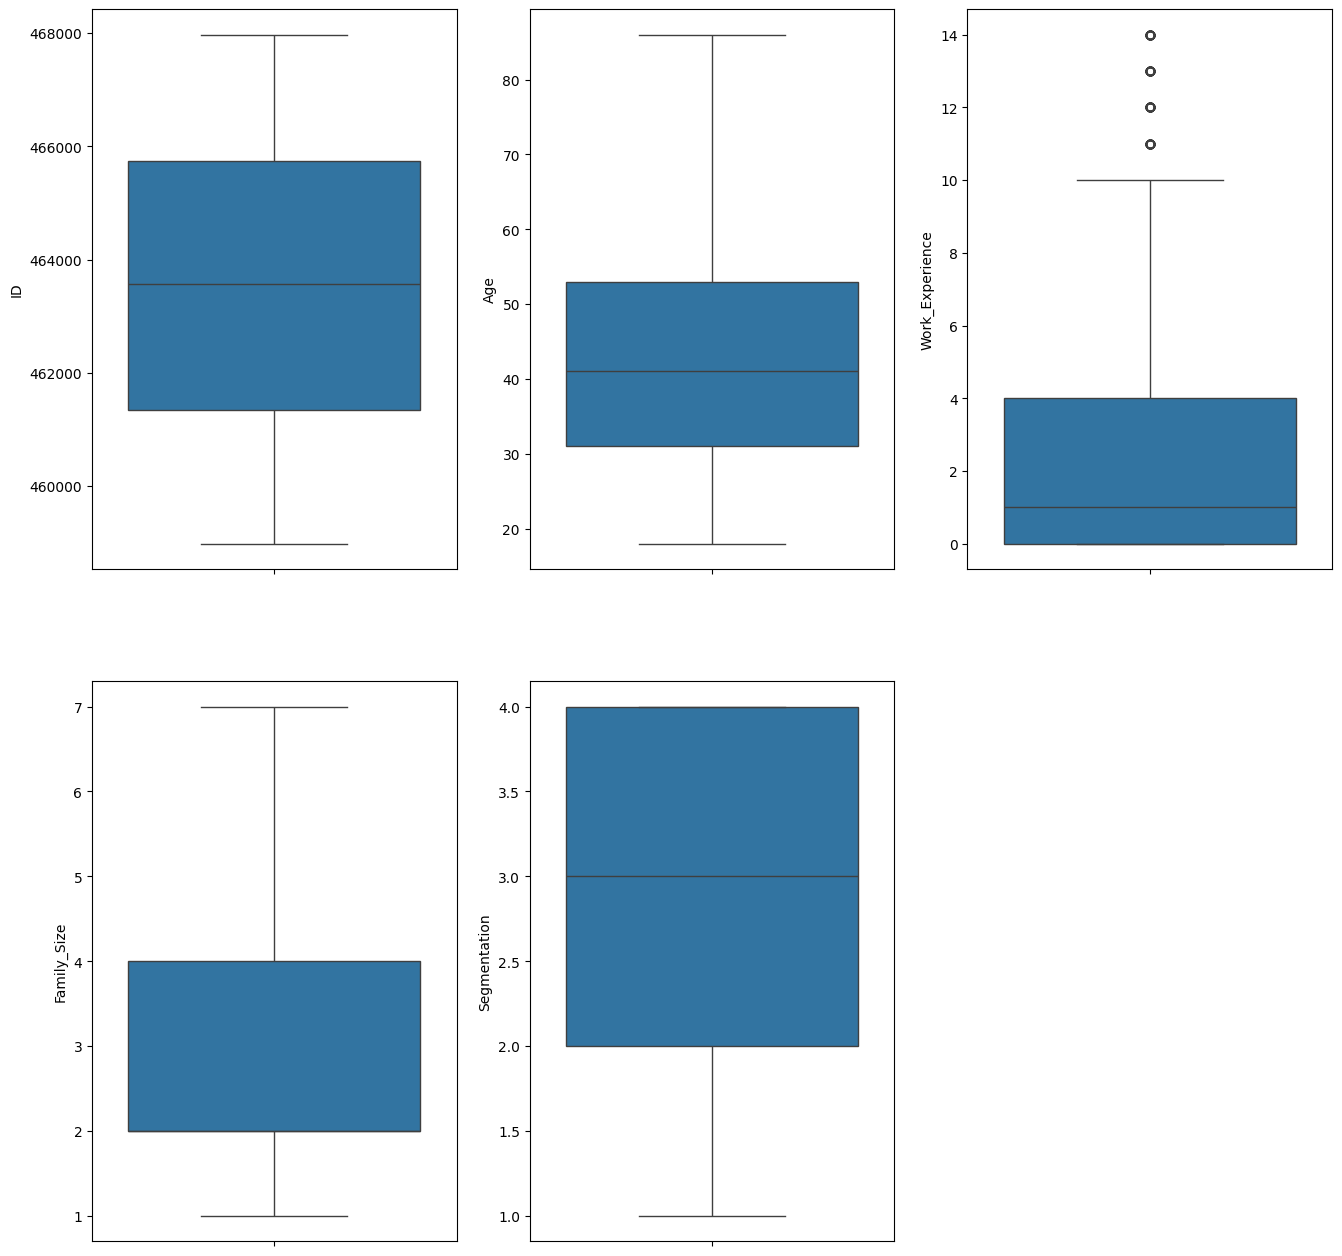

In [ ]:
# numeric outlier

plt.figure(figsize=(16, 16))
for i, col in enumerate(num_cols):
  plt.subplot(2, 3, i+1)
  sns.boxplot(train[col])

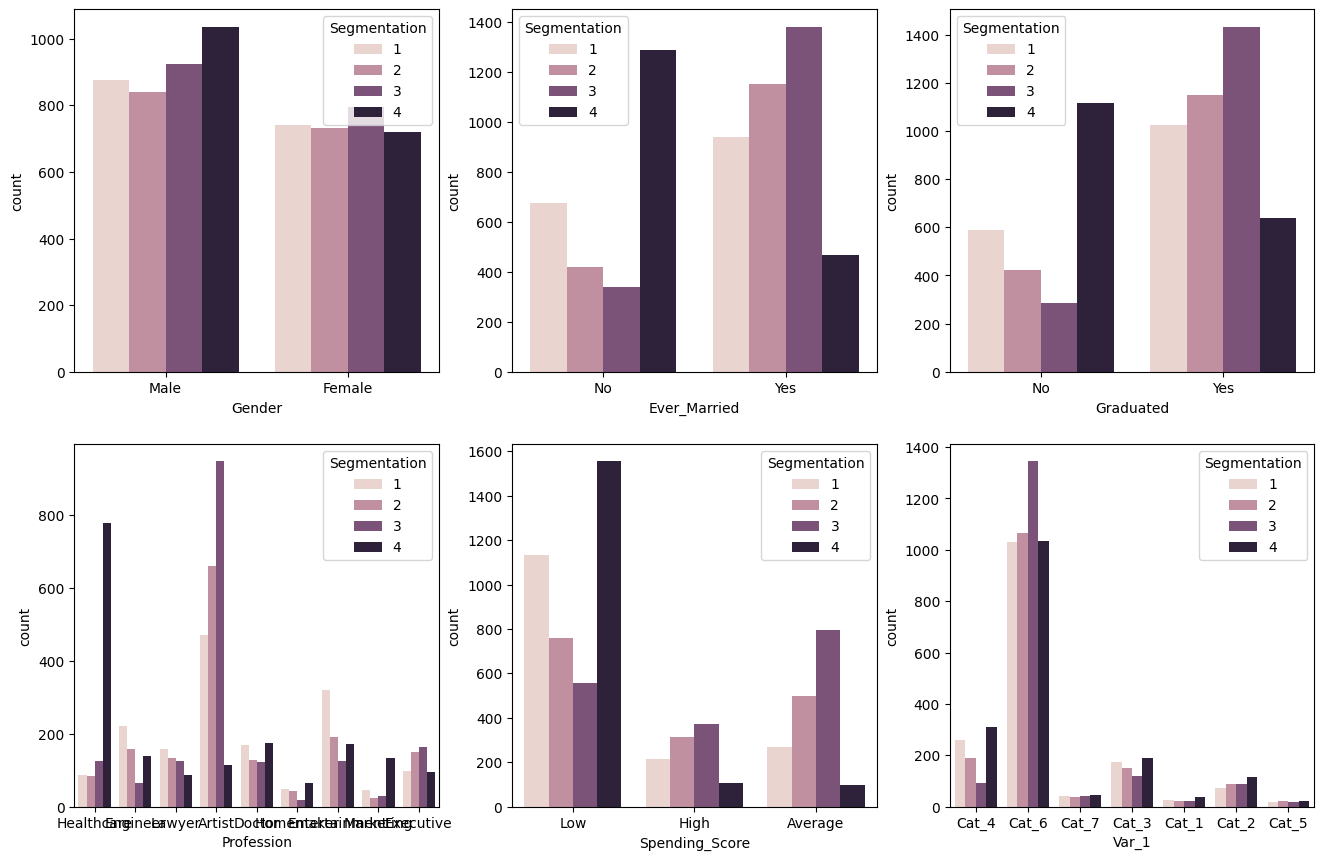

In [ ]:
# categoty

plt.figure(figsize=(16, 16))
for i, col in enumerate(cat_cols):
  plt.subplot(3, 3, i+1)
  sns.countplot(data=train, x=col, hue=target)

In [ ]:
# 모두 그대로 사용해도 될 것 같음. 고유값 개수도 많지 않으므로 Spending_Score 제외 onehot

<Axes: >

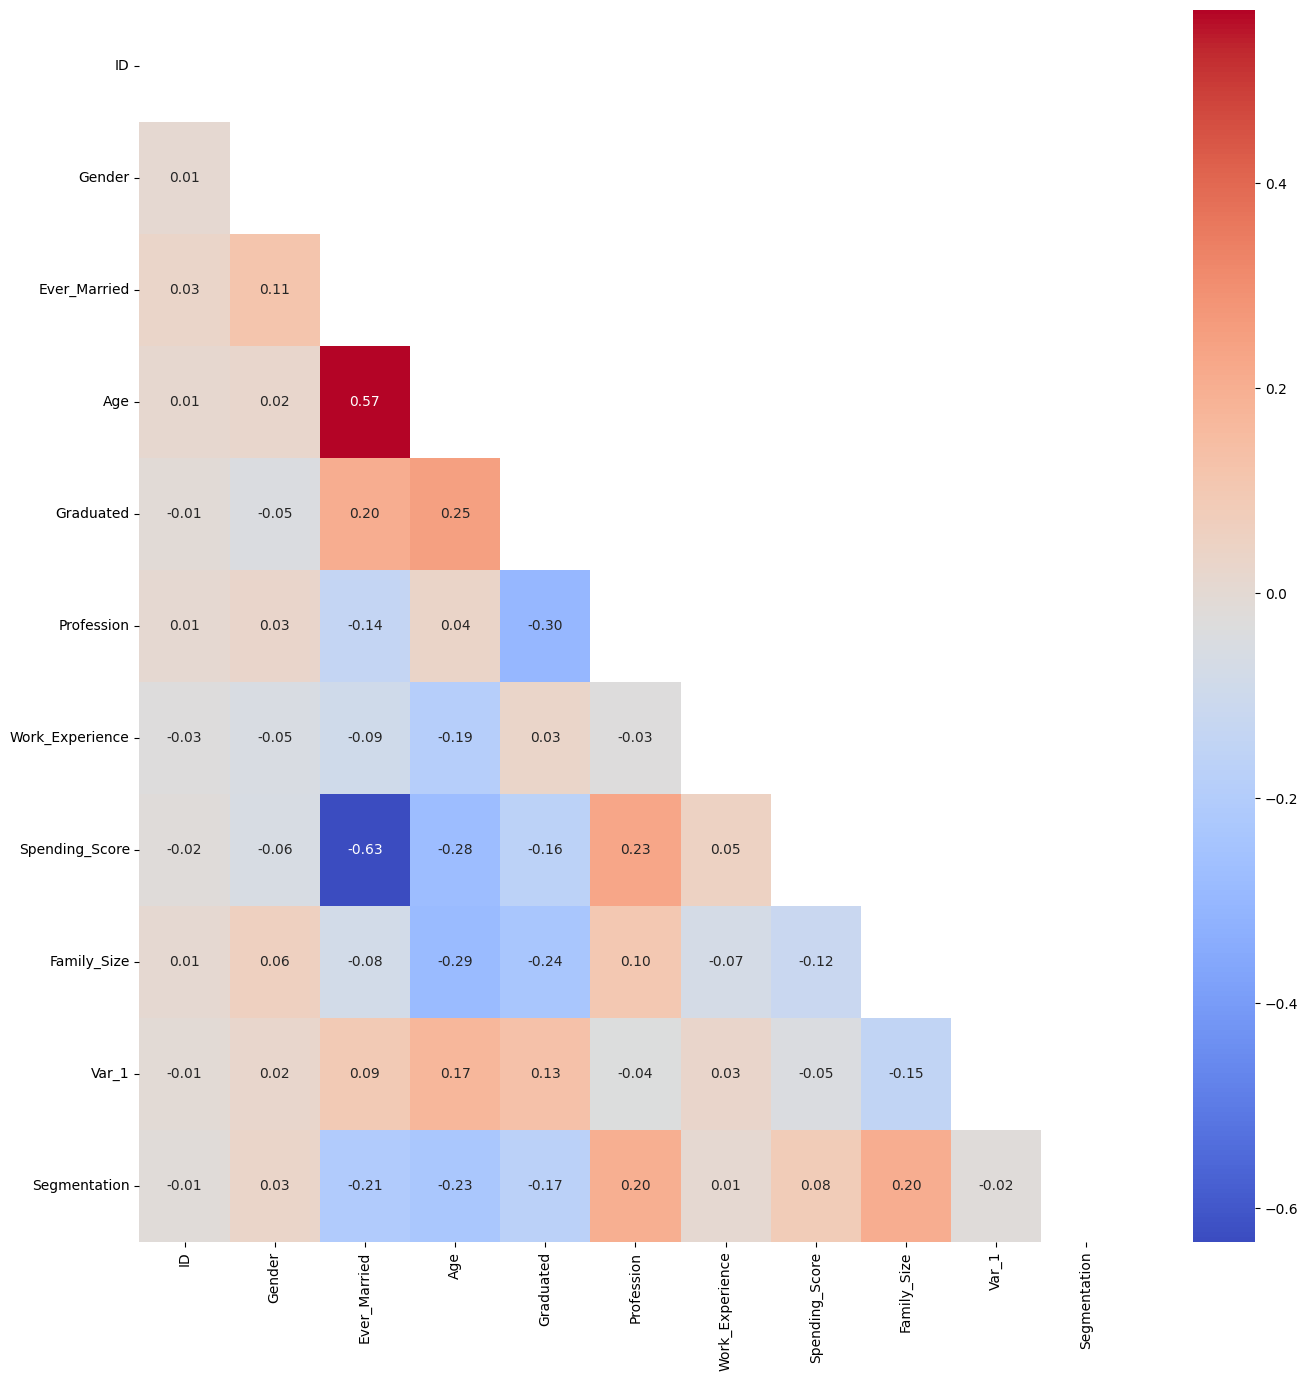

In [ ]:
train_cor = train.copy()

for col in cat_cols:
  train_cor[col] = train_cor[col].astype("category").cat.codes

cor_mat = train_cor.corr()
mask = np.triu(cor_mat)

plt.figure(figsize=(16, 16))
sns.heatmap(cor_mat, fmt='.2f', annot=True, mask=mask, cmap='coolwarm')

In [ ]:
# 변수간 상관관계도 크게 신경쓸 정도 아님!

In [ ]:
def preprocessing1(df):

  if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

  df["Age"] = np.log1p(df["Age"])
  df["Work_Experience"] = df["Work_Experience"].apply(lambda x: "junior" if x < 1 else "senior")

  cat_cols = df.select_dtypes(include=["object"]).columns
  ohs = []
  drop_col = []
  for col in cat_cols:

    if col in ["Work_Experience","Spending_Score"]:
      df[col] = df[col].astype("category").cat.codes
    else:
      oh = pd.get_dummies(df[col], prefix=col).astype(int)
      ohs.append(oh)
      drop_col.append(col)

  df.drop(columns=drop_col, inplace=True)
  df = pd.concat([df, *ohs], axis=1)

  return df

In [ ]:
def preprocessing2(df):

  if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

  df["Age"] = np.log1p(df["Age"])
  #df["Work_Experience"] = df["Work_Experience"].apply(lambda x: "junior" if x < 1 else "senior")

  cat_cols = df.select_dtypes(include=["object"]).columns
  ohs = []
  drop_col = []
  for col in cat_cols:

    #if col in ["Work_Experience","Spending_Score"]:
    if col in ["Spending_Score"]:
      df[col] = df[col].astype("category").cat.codes
    else:
      oh = pd.get_dummies(df[col], prefix=col).astype(int)
      ohs.append(oh)
      drop_col.append(col)

  df.drop(columns=drop_col, inplace=True)
  df = pd.concat([df, *ohs], axis=1)

  return df

In [ ]:
def data_processing3(df):
  df2 = df.copy()
  df2.drop(columns=["ID"], inplace=True)

  cat_col = df2.select_dtypes(include=["object"]).columns

  df2["Age"] = pd.cut(df2["Age"], [10,20,30,40,50,60,70,80,90], right=False)
  df2["Age"] = df2["Age"].cat.codes

  for col in ["Age", "Work_Experience", "Family_Size", "Spending_Score"]:
    df2[col] = df2[col].astype("category").cat.codes

  ohs = pd.DataFrame()
  drops = ["Spending_Score"]

  for col in cat_col:
    if col == "Spending_Score":
      continue

    oh = pd.get_dummies(df2[col], prefix=col).astype(int)
    ohs = pd.concat([ohs, oh], axis=1)
    drops.append(col)

  df3 = pd.concat([df2, ohs], axis=1)
  df3.drop(columns=drops, inplace=True)

  return df3

In [ ]:
train_pre = preprocessing1(train)

train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       6665 non-null   float64
 1   Work_Experience           6665 non-null   int8   
 2   Spending_Score            6665 non-null   int8   
 3   Family_Size               6665 non-null   float64
 4   Segmentation              6665 non-null   int64  
 5   Gender_Female             6665 non-null   int64  
 6   Gender_Male               6665 non-null   int64  
 7   Ever_Married_No           6665 non-null   int64  
 8   Ever_Married_Yes          6665 non-null   int64  
 9   Graduated_No              6665 non-null   int64  
 10  Graduated_Yes             6665 non-null   int64  
 11  Profession_Artist         6665 non-null   int64  
 12  Profession_Doctor         6665 non-null   int64  
 13  Profession_Engineer       6665 non-null   int64  
 14  Professi

In [ ]:
train_pre = preprocessing2(train)

train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       6665 non-null   float64
 1   Work_Experience           6665 non-null   float64
 2   Spending_Score            6665 non-null   int8   
 3   Family_Size               6665 non-null   float64
 4   Segmentation              6665 non-null   int64  
 5   Gender_Female             6665 non-null   int64  
 6   Gender_Male               6665 non-null   int64  
 7   Ever_Married_No           6665 non-null   int64  
 8   Ever_Married_Yes          6665 non-null   int64  
 9   Graduated_No              6665 non-null   int64  
 10  Graduated_Yes             6665 non-null   int64  
 11  Profession_Artist         6665 non-null   int64  
 12  Profession_Doctor         6665 non-null   int64  
 13  Profession_Engineer       6665 non-null   int64  
 14  Professi

In [ ]:
test_pre = preprocessing2(test)

X = train_pre.drop(columns=target)
Y = train_pre[target]

In [ ]:
test_pre = preprocessing2(test)

X = train_pre.drop(columns=target)
Y = train_pre[target]

In [ ]:
X.shape, test_pre.shape

((6665, 26), (2154, 26))

In [ ]:
Y.value_counts(normalize=True)

,proportion
Segmentation,
4,0.26362
3,0.25806
1,0.24246
2,0.23586


In [ ]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# test_pre = scaler.transform(test_pre)

le = LabelEncoder()
Y_le = le.fit_transform(Y)

In [ ]:
model1 = RandomForestClassifier(n_estimators=500)
model2 = XGBClassifier(n_estimators=500)
model3 = LGBMClassifier(n_estimators=500, verbose=None)

score1 = cross_validate(model1, X, Y, return_train_score=True, scoring="f1_macro", cv=StratifiedKFold())
print(f"{model1.__class__.__name__} : {score1['train_score'].mean():.5f} | {score1['test_score'].mean():.5f}")
print()
score2 = cross_validate(model2, X, Y_le, return_train_score=True, scoring="f1_macro", cv=StratifiedKFold())
print(f"{model2.__class__.__name__} : {score2['train_score'].mean():.5f} | {score2['test_score'].mean():.5f}")
print()
score3 = cross_validate(model3, X, Y, return_train_score=True, scoring="f1_macro", cv=StratifiedKFold())
print(f"{model3.__class__.__name__} : {score3['train_score'].mean():.5f} | {score3['test_score'].mean():.5f}")

RandomForestClassifier : 0.91973 | 0.46884

XGBClassifier : 0.90196 | 0.46572

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 5332, number of used features: 26
[LightGBM] [Info] Start training from score -1.416761
[LightGBM] [Info] Start training from score -1.444203
[LightGBM] [Info] Start training from score -1.354546
[LightGBM] [Info] Start training from score -1.333689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 5332, number of used features: 26
[Li

In [ ]:
model1 = RandomForestClassifier(n_estimators=500)
model2 = XGBClassifier(n_estimators=500)
model3 = LGBMClassifier(n_estimators=500, verbose=None)

score1 = cross_validate(model1, X, Y, return_train_score=True, scoring="f1_macro", cv=StratifiedKFold())
print(f"{model1.__class__.__name__} : {score1['train_score'].mean():.5f} | {score1['test_score'].mean():.5f}")
print()
score2 = cross_validate(model2, X, Y_le, return_train_score=True, scoring="f1_macro", cv=StratifiedKFold())
print(f"{model2.__class__.__name__} : {score2['train_score'].mean():.5f} | {score2['test_score'].mean():.5f}")
print()
score3 = cross_validate(model3, X, Y, return_train_score=True, scoring="f1_macro", cv=StratifiedKFold())
print(f"{model3.__class__.__name__} : {score3['train_score'].mean():.5f} | {score3['test_score'].mean():.5f}")

RandomForestClassifier : 0.95858 | 0.48039

XGBClassifier : 0.94177 | 0.47581

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 5332, number of used features: 26
[LightGBM] [Info] Start training from score -1.416761
[LightGBM] [Info] Start training from score -1.444203
[LightGBM] [Info] Start training from score -1.354546
[LightGBM] [Info] Start training from score -1.333689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 5332, number of used features: 26
[Li

좀 더 기억하기 쉬운 방식

In [ ]:
X_train = train.iloc[:, :-1]
Y_train = train[['ID', 'Segmentation']]
X_test = test

In [ ]:
for x in [X_train, Y_train, X_test]:
    print(x.shape)

(6665, 10)
(6665, 2)
(2154, 10)


In [ ]:
#Y_train.info()
print(Y_train['Segmentation'].value_counts(normalize=True))

Segmentation
4   0.2636
3   0.2581
1   0.2425
2   0.2359
Name: proportion, dtype: float64


In [ ]:
dfX = pd.concat([X_train, X_test], axis=0, ignore_index=True)
#dfX.info()
print(dfX.isna().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [ ]:
object_cols = dfX.select_dtypes(include='object').columns # 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1

for col in object_cols:
   print(f"{dfX[col].name} : {dfX[col].unique()}")

Gender : ['Male' 'Female']
Ever_Married : ['No' 'Yes']
Graduated : ['No' 'Yes']
Profession : ['Healthcare' 'Engineer' 'Lawyer' 'Artist' 'Doctor' 'Homemaker'
 'Entertainment' 'Marketing' 'Executive']
Spending_Score : ['Low' 'High' 'Average']
Var_1 : ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']


In [ ]:
# label encoding
for x in ['Profession', 'Spending_Score', 'Var_1']:
    dfX[x] = dfX[x].astype('category').cat.codes

# one-hot encoding
a = dfX['Gender'].str.get_dummies()
b = dfX['Ever_Married'].str.get_dummies()
c = dfX['Graduated'].str.get_dummies()

dfX_oh = dfX.drop(columns=['Gender', 'Ever_Married', 'Graduated'])
dfX2 = pd.concat([dfX_oh, a, b, c], axis=1)
#dfX2.info()

In [ ]:
X = dfX2.iloc[:6665, 1:]
X_submission = dfX2.iloc[6665:, 1:]
Y1 = Y_train['Segmentation']

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

Xs = scaler2.fit_transform(X)
Xs_submission = scaler2.transform(X_submission)

for x in [Xs, Y1, Xs_submission]:
    print(x.shape)

(6665, 12)
(6665,)
(2154, 12)


In [ ]:
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    C = A - B
    ypred = model.predict(xtest)
    D = f1_score(ytest, ypred, average='macro')
    return '{:.4f} {:.4f} {:.4f} {:.4f}'.format(A, B, C, D)

def select_model(xtrain, xtest, ytrain, ytest):
    for d in range(3, 8):
        model1 = DecisionTreeClassifier(max_depth=d, random_state=1234).fit(xtrain, ytrain)
        print(f'model1_{d}: ', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for d in range(3, 8):
        model2 = RandomForestClassifier(n_estimators=500, max_depth=d, random_state=1234).fit(xtrain, ytrain)
        print(f'model2_{d}: ', get_scores(model2, xtrain, xtest, ytrain, ytest))

    for d in range(3, 8):
        model3 = XGBClassifier(n_estimators=500, max_depth=d, eval_metric='logloss', use_label_encoder=False, gamma=7, random_state=1234).fit(xtrain, ytrain)
        print(f'model3_{d}: ', get_scores(model3, xtrain, xtest, ytrain, ytest))

    model4 = LGBMClassifier(n_estimators=500, min_child_samples=50, learning_rate=0.001, random_state=1234).fit(xtrain, ytrain)
    print('model4: ', get_scores(model4, xtrain, xtest, ytrain, ytest))

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(Xs, Y1,
                                                test_size=0.25,
                                                stratify=Y1,
                                                random_state=1234)

select_model(xtrain, xtest, ytrain, ytest)
# model3_5:  0.5436 0.5450 -0.0014 0.5281
# model3_3:  0.5438 0.5447 -0.0009 0.5289

In [ ]:
model = XGBClassifier(n_estimators=500, max_depth=3, eval_metric='logloss', use_label_encoder=False, gamma=7, random_state=1234).fit(xtrain, ytrain)
#print('decided_model: ', get_scores(model, xtrain, xtest, ytrain, ytest))

In [ ]:
pred = model.predict(Xs_submission)
Submission = pd.DataFrame({'ID' : X_test['ID'],
                           'Segmentation' : pred})
Submission.to_csv('0505632.csv', index=False)

grid search 이용

In [ ]:
help(GradientBoostingClassifier())

# GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100,
#      subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
#      min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None,
#      max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1,
#      n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regressio

In [ ]:
help(RandomizedSearchCV(1, 1))

# RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True,
#cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)


Help on RandomizedSearchCV in module sklearn.model_selection._search object:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
 |  
 |  Randomized search on hyper parameters.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 | 

In [ ]:
model = GradientBoostingClassifier()

params = {
    'learning_rate' : [0.01, 0.05],
    'n_estimators' : [50, 100],
    'max_depth' : [3, 5],
    'verbose' : [True],
    'random_state' : [42]
}

grid_model = RandomizedSearchCV(model, params, cv=3, scoring='f1_macro')
grid_model.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3807            1.49s
         2           1.3762            1.41s
         3           1.3718            1.37s
         4           1.3675            1.34s
         5           1.3633            1.30s
         6           1.3592            1.26s
         7           1.3553            1.23s
         8           1.3513            1.25s
         9           1.3475            1.23s
        10           1.3438            1.21s
        20           1.3100            0.92s
        30           1.2815            0.64s
        40           1.2573            0.31s
        50           1.2369            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3805            1.40s
         2           1.3759            1.44s
         3           1.3713            1.38s
         4           1.3668            1.34s
         5           1.3624            1.33s
         6           1.3582            1.33s
        

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05],
                                        'max_depth': [3, 5],
                                        'n_estimators': [50, 100],
                                        'random_state': [42],
                                        'verbose': [True]},
                   scoring='f1_macro')

In [ ]:
pred = grid_model.predict(X_train)

f1 = metrics.f1_score(Y_train, pred, average='macro')
print(f1)

0.5285504863318302


In [ ]:
grid_model.best_params_, grid_model.best_score_

({'verbose': True,
  'random_state': 42,
  'n_estimators': 100,
  'max_depth': 3,
  'learning_rate': 0.05},
 0.4983785559233451)

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

## 고객 물품 제시간에 도착 여부

- 고객 구매 데이터를 사용해서 고객이 주문한 물품이 제 시간에 도착여부(Reached.on.Time_Y.N) 예측
- X_train.csv, y_train.csv : 학습 및 학습평가에 사용하는 파일
- X_test.csv : 제출용 데이터 생성에 사용하는 파일
- roc_score를 사용하여 평가
- Reached.on.Time_Y.N은 제 시간에 도착할 확률
        ID,Reached.on.Time_Y.N
        7007,0.27419354838709675
        9793,0.4883720930232558
        6593,0.48174157303370785
        10527,0.3657243816254417

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_rows = 500
pd.options.display.max_columns = 20
pd.set_option('display.float_format', '{:.5f}'.format)

target = Reached.on.Time_Y.N

In [ ]:
# [0] x_train, x_test 데이터로 생성함
# 이 부분은 시험에서는 없습니다. 그냥 데이터를 3개로 나누기 위해 사용한 것입니다.
from sklearn.model_selection import train_test_split

dftot = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/1st_Train.csv')
trainset, testset = train_test_split(dftot, test_size=0.3, stratify=dftot['Reached.on.Time_Y.N'], random_state=0)
testset = testset.iloc[:, :-1]

In [ ]:
trainset.shape, testset.shape

((7699, 12), (3300, 11))

In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7699 entries, 5014 to 4080
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   7699 non-null   int64 
 1   Warehouse_block      7699 non-null   object
 2   Mode_of_Shipment     7699 non-null   object
 3   Customer_care_calls  7699 non-null   int64 
 4   Customer_rating      7699 non-null   int64 
 5   Cost_of_the_Product  7699 non-null   int64 
 6   Prior_purchases      7699 non-null   int64 
 7   Product_importance   7699 non-null   object
 8   Gender               7699 non-null   object
 9   Discount_offered     7699 non-null   int64 
 10  Weight_in_gms        7699 non-null   int64 
 11  Reached.on.Time_Y.N  7699 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 781.9+ KB


In [ ]:
trainset.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [ ]:
trainset.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
9901,9902,F,Ship,3,5,214,2,medium,F,6,4578,0
9500,9501,A,Ship,4,2,201,3,medium,F,4,4613,0
6110,6111,A,Ship,4,2,264,3,low,M,10,5137,1
587,588,F,Ship,3,5,194,2,medium,M,4,3496,1
10805,10806,F,Road,5,5,269,5,medium,F,3,1120,0
2137,2138,F,Ship,5,3,239,4,low,M,3,3734,1
6095,6096,F,Ship,6,4,195,5,high,F,10,4225,0
7375,7376,F,Road,3,1,194,2,medium,F,1,5931,0
8144,8145,A,Ship,4,5,266,3,medium,F,2,4867,0
8799,8800,B,Ship,2,4,248,3,low,F,7,4142,0


In [ ]:
X = trainset.iloc[:, :-1]
Y = trainset.iloc[:, -1]

In [ ]:
totalX = pd.concat([X, testset], axis=0, ignore_index=True)
totalX.shape

(10999, 11)

In [ ]:
totalX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [ ]:
totalX.nunique() # 값이 1개로만 이루어져 있는 변수 확인

,0
ID,10999
Warehouse_block,5
Mode_of_Shipment,3
Customer_care_calls,6
Customer_rating,5
Cost_of_the_Product,215
Prior_purchases,8
Product_importance,3
Gender,2
Discount_offered,65


In [ ]:
labeled_totalX = totalX.copy()
object_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in object_cols:
  print(labeled_totalX[col].unique())
  labeled_totalX[col] = labeled_totalX[col].astype('category').cat.codes

labeled_totalX.info()

for col in object_cols:
  print(labeled_totalX[col].unique())

['C' 'A' 'F' 'D' 'B']
['Ship' 'Flight' 'Road']
['low' 'medium' 'high']
['M' 'F']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int8 
 2   Mode_of_Shipment     10999 non-null  int8 
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int8 
 8   Gender               10999 non-null  int8 
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
dtypes: int64(7), int8(4)
memory usage: 644.6 KB
[2 0 4 3 1]
[2 0 1]
[1 2 0]
[1 0]


In [ ]:
onehot_totalX = totalX.copy()
object_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
one_hots = []

for col in object_cols:
  one_hot = onehot_totalX[col].str.get_dummies()
  one_hots.append(one_hot)

onehot_result = pd.concat(one_hots, axis=1)
onehot_totalX.drop(columns=object_cols, inplace=True)
onehot_totalX = pd.concat([onehot_totalX, onehot_result], axis=1)

onehot_totalX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Customer_care_calls  10999 non-null  int64
 2   Customer_rating      10999 non-null  int64
 3   Cost_of_the_Product  10999 non-null  int64
 4   Prior_purchases      10999 non-null  int64
 5   Discount_offered     10999 non-null  int64
 6   Weight_in_gms        10999 non-null  int64
 7   A                    10999 non-null  int64
 8   B                    10999 non-null  int64
 9   C                    10999 non-null  int64
 10  D                    10999 non-null  int64
 11  F                    10999 non-null  int64
 12  Flight               10999 non-null  int64
 13  Road                 10999 non-null  int64
 14  Ship                 10999 non-null  int64
 15  high                 10999 non-null  int64
 16  low                  1

In [ ]:
onehot_result

,A,B,C,D,F,Flight,Road,Ship,high,low,medium,F,M
0,0,0,1,0,0,0,0,1,0,1,0,0,1
1,1,0,0,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,1,0,0,1,0,0,1,0,1
3,1,0,0,0,0,0,0,1,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0,0,0,0,1,0,1,0,0,0,1,0,1
10995,0,1,0,0,0,0,0,1,0,0,1,0,1
10996,0,0,0,0,1,0,0,1,1,0,0,1,0
10997,1,0,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

labeled_X = labeled_totalX.iloc[:7699, 1:]
labeled_X_submission = labeled_totalX.iloc[7699:, 1:]
onehot_X = onehot_totalX.iloc[:7699, 1:]
onehot_X_submission = onehot_totalX.iloc[7699:, 1:]

scaled_labeled_X = scaler2.fit_transform(labeled_X)
scaled_labeled_X_submission = scaler2.transform(labeled_X_submission)
scaled_onehot_X = scaler2.fit_transform(onehot_X)
scaled_onehot_X_submission = scaler2.transform(onehot_X_submission)

In [ ]:
onehot_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7699 entries, 0 to 7698
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_care_calls  7699 non-null   int64
 1   Customer_rating      7699 non-null   int64
 2   Cost_of_the_Product  7699 non-null   int64
 3   Prior_purchases      7699 non-null   int64
 4   Discount_offered     7699 non-null   int64
 5   Weight_in_gms        7699 non-null   int64
 6   A                    7699 non-null   int64
 7   B                    7699 non-null   int64
 8   C                    7699 non-null   int64
 9   D                    7699 non-null   int64
 10  F                    7699 non-null   int64
 11  Flight               7699 non-null   int64
 12  Road                 7699 non-null   int64
 13  Ship                 7699 non-null   int64
 14  high                 7699 non-null   int64
 15  low                  7699 non-null   int64
 16  medium               769

In [ ]:
Y.value_counts(normalize=True)

,proportion
Reached.on.Time_Y.N,
1,0.59670
0,0.40330


In [ ]:
def select_model(X, Y):
  x_train, x_valid, y_train, y_valid = train_test_split(X, Y,
                                                        test_size=0.2,
                                                        stratify=Y,
                                                        random_state=42)

  model = LogisticRegression()
  model.fit(x_train, y_train)
  print(f'{model.__class__.__name__} - ', get_scores(model, x_train, x_valid, y_train, y_valid))
  print()

  for d in range(3, 8):
    model = DecisionTreeClassifier(max_depth = d, random_state=42)
    model.fit(x_train, y_train)
    print(f'{model.__class__.__name__} {d} - ', get_scores(model, x_train, x_valid, y_train, y_valid))
    print()

  for d in range(3, 8):
    model = RandomForestClassifier(n_estimators=500, max_depth = d, random_state=42)
    model.fit(x_train, y_train)
    print(f'{model.__class__.__name__} {d} - ', get_scores(model, x_train, x_valid, y_train, y_valid))
    print()

  for d in range(3, 8):
    model = XGBClassifier(n_estimators=500, max_depth=d, eval_metric='logloss',
                          use_label_encoder=False, gamma=7, random_state=42)
    model.fit(x_train, y_train)
    print(f'{model.__class__.__name__} {d} - ', get_scores(model, x_train, x_valid, y_train, y_valid))
    print()

  model = LGBMClassifier(n_estimators=500, learning_rate=0.001,
                         min_child_samples=100, random_state=42)
  model.fit(x_train, y_train)
  print(f'{model.__class__.__name__} - ', get_scores(model, x_train, x_valid, y_train, y_valid))
  print("Done.")

def get_scores(model, x_train, x_valid, y_train, y_valid):
  result_t = model.score(x_train, y_train)
  result_v = model.score(x_valid, y_valid)
  diff = result_t - result_v

  val_pred = model.predict_proba(x_valid)[:, 1]
  roc = roc_auc_score(y_valid, val_pred)

  return 'train: {:.5f} | valid: {:.5f} | diff: {:.5f} | roc: {:.5f}'.format(result_t, result_v, diff, roc)


In [ ]:
select_model(labeled_X, Y)

LogisticRegression -  train: 0.63793 | valid: 0.63961 | diff: -0.00168 | roc: 0.71114

DecisionTreeClassifier 3 -  train: 0.67690 | valid: 0.66883 | diff: 0.00806 | roc: 0.73985

DecisionTreeClassifier 4 -  train: 0.68420 | valid: 0.67208 | diff: 0.01212 | roc: 0.73168

DecisionTreeClassifier 5 -  train: 0.69021 | valid: 0.67208 | diff: 0.01813 | roc: 0.73311

DecisionTreeClassifier 6 -  train: 0.69459 | valid: 0.65195 | diff: 0.04265 | roc: 0.70279

DecisionTreeClassifier 7 -  train: 0.70109 | valid: 0.66688 | diff: 0.03420 | roc: 0.71905

RandomForestClassifier 3 -  train: 0.67235 | valid: 0.67078 | diff: 0.00157 | roc: 0.72651

RandomForestClassifier 4 -  train: 0.68875 | valid: 0.67468 | diff: 0.01407 | roc: 0.72757

RandomForestClassifier 5 -  train: 0.69524 | valid: 0.67208 | diff: 0.02316 | roc: 0.72443

RandomForestClassifier 6 -  train: 0.70547 | valid: 0.67143 | diff: 0.03404 | roc: 0.72195

RandomForestClassifier 7 -  train: 0.72836 | valid: 0.66429 | diff: 0.06408 | roc: 0.

In [ ]:
select_model(scaled_labeled_X, Y)

LogisticRegression -  train: 0.64020 | valid: 0.63961 | diff: 0.00059 | roc: 0.71841

DecisionTreeClassifier 3 -  train: 0.67690 | valid: 0.66883 | diff: 0.00806 | roc: 0.73985

DecisionTreeClassifier 4 -  train: 0.68420 | valid: 0.67208 | diff: 0.01212 | roc: 0.73168

DecisionTreeClassifier 5 -  train: 0.69021 | valid: 0.67208 | diff: 0.01813 | roc: 0.73311

DecisionTreeClassifier 6 -  train: 0.69459 | valid: 0.65195 | diff: 0.04265 | roc: 0.70279

DecisionTreeClassifier 7 -  train: 0.70109 | valid: 0.66688 | diff: 0.03420 | roc: 0.71905

RandomForestClassifier 3 -  train: 0.67251 | valid: 0.67078 | diff: 0.00173 | roc: 0.72643

RandomForestClassifier 4 -  train: 0.68891 | valid: 0.67403 | diff: 0.01488 | roc: 0.72745

RandomForestClassifier 5 -  train: 0.69541 | valid: 0.67143 | diff: 0.02398 | roc: 0.72447

RandomForestClassifier 6 -  train: 0.70547 | valid: 0.67078 | diff: 0.03469 | roc: 0.72191

RandomForestClassifier 7 -  train: 0.72836 | valid: 0.66494 | diff: 0.06343 | roc: 0.7

In [ ]:
select_model(onehot_X, Y)

LogisticRegression -  train: 0.63825 | valid: 0.63312 | diff: 0.00514 | roc: 0.71034

DecisionTreeClassifier 3 -  train: 0.67690 | valid: 0.66883 | diff: 0.00806 | roc: 0.73985

DecisionTreeClassifier 4 -  train: 0.68420 | valid: 0.67208 | diff: 0.01212 | roc: 0.73168

DecisionTreeClassifier 5 -  train: 0.69021 | valid: 0.67208 | diff: 0.01813 | roc: 0.73311

DecisionTreeClassifier 6 -  train: 0.69459 | valid: 0.65130 | diff: 0.04329 | roc: 0.70259

DecisionTreeClassifier 7 -  train: 0.70093 | valid: 0.66753 | diff: 0.03339 | roc: 0.72088

RandomForestClassifier 3 -  train: 0.67478 | valid: 0.66558 | diff: 0.00920 | roc: 0.72840

RandomForestClassifier 4 -  train: 0.69005 | valid: 0.67273 | diff: 0.01732 | roc: 0.72804

RandomForestClassifier 5 -  train: 0.70109 | valid: 0.67078 | diff: 0.03031 | roc: 0.72647

RandomForestClassifier 6 -  train: 0.72025 | valid: 0.66688 | diff: 0.05336 | roc: 0.72137

RandomForestClassifier 7 -  train: 0.74070 | valid: 0.66364 | diff: 0.07707 | roc: 0.7

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
select_model(scaled_onehot_X, Y)

LogisticRegression -  train: 0.63939 | valid: 0.63961 | diff: -0.00022 | roc: 0.71800

DecisionTreeClassifier 3 -  train: 0.67690 | valid: 0.66883 | diff: 0.00806 | roc: 0.73985

DecisionTreeClassifier 4 -  train: 0.68420 | valid: 0.67208 | diff: 0.01212 | roc: 0.73168

DecisionTreeClassifier 5 -  train: 0.69021 | valid: 0.67208 | diff: 0.01813 | roc: 0.73311

DecisionTreeClassifier 6 -  train: 0.69459 | valid: 0.65130 | diff: 0.04329 | roc: 0.70259

DecisionTreeClassifier 7 -  train: 0.70093 | valid: 0.66753 | diff: 0.03339 | roc: 0.72088

RandomForestClassifier 3 -  train: 0.67495 | valid: 0.66558 | diff: 0.00936 | roc: 0.72835

RandomForestClassifier 4 -  train: 0.69021 | valid: 0.67273 | diff: 0.01748 | roc: 0.72799

RandomForestClassifier 5 -  train: 0.70125 | valid: 0.67078 | diff: 0.03047 | roc: 0.72637

RandomForestClassifier 6 -  train: 0.72025 | valid: 0.66688 | diff: 0.05336 | roc: 0.72136

RandomForestClassifier 7 -  train: 0.74054 | valid: 0.66429 | diff: 0.07626 | roc: 0.

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(scaled_onehot_X, Y,
                                                        test_size=0.2,
                                                        stratify=Y,
                                                        random_state=42)

model = XGBClassifier(n_estimators=500, max_depth=6, eval_metric='logloss', use_label_encoder=False, gamma=7, random_state=1234).fit(x_train, y_train)
pred = model.predict_proba(scaled_onehot_X_submission)[:, 1]
Submission = pd.DataFrame({'ID' : totalX.iloc[7699:, 0],
                           'Reached.on.Time_Y.N' : pred})